# To run:


In [357]:
import pandas as pd
import numpy as np
import random


In [358]:
#DATA EXPLORATION
data = pd.read_csv('../feature_extraction/features.csv')

In [359]:
data.shape

(40, 3)

In [360]:
data.groupby(["Label"]).count()

,fileName,F1
Label,,
no,20,20
yes,20,20


In [361]:
# Replace labels with 0 for speech and 1 for music
data["Label"] = (data["Label"] == "yes").astype(int)

# Check to make sure it worked
data.head()

,fileName,F1,Label
0,sp1.wav,10118,0
1,sp2.wav,8002,0
2,sp3.wav,8608,0
3,sp4.wav,9320,0
4,sp5.wav,12060,0


In [362]:
# Separate the features (x) from the labels (y)
y = data["Label"]
x = data.drop(["Label"], axis=1)

In [363]:
# For reproducable results, set the seed
# random_seed = 45 # Precision: 0.333333; Recall = 0.600000
random_seed = 22 # Precision: 0.666667; Recall = 0.500000
np.random.seed(random_seed)
random.seed(random_seed)

# Split into training and testing data 
from sklearn.model_selection import train_test_split

# The directions say to use 1/3 of the data for testing and 2/3 for training
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state=random_seed)



In [364]:
x_train.shape


(26, 2)

In [365]:
# The directions say to indicate which of the files are used for training
print(x_train.sort_index()["fileName"])

0      sp1.wav
2      sp3.wav
3      sp4.wav
4      sp5.wav
5      sp6.wav
6      sp7.wav
7      sp8.wav
8      sp9.wav
9     sp10.wav
13    sp14.wav
14    sp15.wav
15    sp16.wav
17    sp18.wav
18    sp19.wav
20     mu1.wav
23     mu4.wav
24     mu5.wav
25     mu6.wav
26     mu7.wav
28     mu9.wav
29    mu10.wav
30    mu11.wav
31    mu12.wav
32    mu13.wav
35    mu16.wav
36    mu17.wav
Name: fileName, dtype: object


In [366]:
x_train

,fileName,F1
3,sp4.wav,9320
30,mu11.wav,3957
6,sp7.wav,5242
17,sp18.wav,4015
32,mu13.wav,4544
25,mu6.wav,4063
15,sp16.wav,13775
5,sp6.wav,3744
23,mu4.wav,7514
35,mu16.wav,9074


In [367]:
y_train

3     0
30    1
6     0
17    0
32    1
25    1
15    0
5     0
23    1
35    1
9     0
2     0
7     0
26    1
24    1
13    0
28    1
14    0
18    0
29    1
31    1
8     0
20    1
36    1
0     0
4     0
Name: Label, dtype: int32

In [368]:
x_test

,fileName,F1
39,mu20.wav,8144
38,mu19.wav,11622
21,mu2.wav,6473
22,mu3.wav,6147
33,mu14.wav,2693
1,sp2.wav,8002
12,sp13.wav,6260
16,sp17.wav,13712
37,mu18.wav,9044
10,sp11.wav,8947


In [369]:
y_test

39    1
38    1
21    1
22    1
33    1
1     0
12    0
16    0
37    1
10    0
27    1
11    0
19    0
34    1
Name: Label, dtype: int32

In [370]:
# Remove the filename, leaving only the features
x_train = x_train.drop(["fileName"], axis=1)
x_test = x_test.drop(["fileName"], axis=1)

In [371]:
# Modified from https://scikit-learn.org/stable/model_persistence.html
from sklearn import svm
model = svm.SVC()
model.fit(x_train, y_train)

SVC()

In [372]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = (model.predict(x_test) > 0.5).astype("int32")
cf_matrix = confusion_matrix(y_test, y_pred)


[Text(0, 0.5, 'Not Music'), Text(0, 1.5, 'Music')]

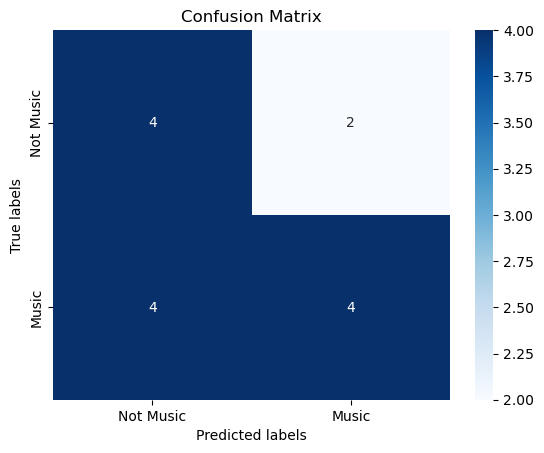

In [373]:
ax= plt.subplot()
#annot=True to annotate cells
sns.heatmap(cf_matrix, annot=True, ax = ax,cmap='Blues',fmt='')
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Not Music', 'Music']); ax.yaxis.set_ticklabels(['Not Music', 'Music'])

In [374]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print('Precision: %.6f' % precision_score(y_test, y_pred, zero_division=1))
print('Recall = %.6f' % recall_score(y_test, y_pred, zero_division=1))

Precision: 0.666667
Recall = 0.500000
